# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import os
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
# your code here
os.chdir('/Users/abreualberto91/IRONHACK/Datasets/employees')

employees = pd.read_csv('employees.csv').drop('Unnamed: 0', axis = 1)



In [13]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [25]:
# Method 1
# your code here
pd.pivot_table(employees, values='Salary', index=['Department'], \
                       aggfunc=np.mean).rename(columns = {'Salary': 'mean_salary'})

,mean_salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [21]:
# Method 2
employees.groupby('Department').mean().drop('Years', axis =1).rename(columns = {'Salary': 'mean_salary'})
# your code here

,mean_salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [35]:
# your code here
pd.pivot_table(employees, values=['Salary'], index=['Department'], \
                       columns = ['Title'], aggfunc=np.mean).rename(columns = {'Salary': 'mean_salary'})

mean_salary                  
Title               VP analyst associate
Department                              
HR                70.0    32.5       NaN
IT                70.0    32.5      60.0
Sales              NaN     NaN      55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [39]:
# your code here
pd.pivot_table(employees, values= ['Salary','Years'], index=['Title'], aggfunc=np.mean).\
            rename(columns={'Salary':'mean_salary', 'Years':'mean_years'})

,mean_salary,mean_years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [80]:
# your code here
pd.pivot_table(employees, values=['Salary'],index=['Department','Title'],\
               aggfunc={'Salary':np.mean, 'Title': pd.Series.nunique})



Salary  Title
Department Title                   
HR         VP           70.0      1
           analyst      32.5      1
IT         VP           70.0      1
           analyst      32.5      1
           associate    60.0      1
Sales      associate    55.0      1

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [88]:
# your code here
pd.pivot_table(employees, values=['Salary'],index=['Department','Title'],\
               aggfunc={'Salary': [min, max, np.mean, np.std]}, fill_value=0)


Salary                      
                        max  mean   min       std
Department Title                                 
HR         VP          70.0  70.0  70.0       NaN
           analyst     35.0  32.5  30.0  3.535534
IT         VP          70.0  70.0  70.0       NaN
           analyst     35.0  32.5  30.0  3.535534
           associate   60.0  60.0  60.0       NaN
Sales      associate   55.0  55.0  55.0  0.000000

In [ ]:
"""
your commments here

Based on size of the sample, there is not much we can say rather that the range of the salaries is very 
short, up to the point that in some cases we do not have a range like the HR VIP. For this reason there 
is no spread measurement, making the std a NaN value. If std is 0 that means that every data point is equal to
the mean. 

Additionally, there is no difference between the salaries of VIPs among the departments, similar with 
the analysts and associates. Between them is clear that the VIPs are leading the salary scale, follow by 
the associates and last the analyst. (And here I am stuying to become a Analyst haha, lucky me). 

To summarize, this company has very clear what the salary per position is, there are no differences between
departments. 

"""

#### Based on your comments, fill the missing values with an appropriate value.

In [89]:
# your code here
pd.pivot_table(employees, values=['Salary'],index=['Department','Title'],\
               aggfunc={'Salary': [min, max, np.mean, np.std]}, fill_value=0)

Salary                    
                        max  mean min       std
Department Title                               
HR         VP            70  70.0  70  0.000000
           analyst       35  32.5  30  3.535534
IT         VP            70  70.0  70  0.000000
           analyst       35  32.5  30  3.535534
           associate     60  60.0  60  0.000000
Sales      associate     55  55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [92]:
# your code here
pd.pivot_table(employees, values=['Salary','Name'],index=['Department'],\
               aggfunc={'Salary': np.sum, 'Name' : pd.Series.nunique}).\
                rename(columns = {'Name': 'employees', 'Salary': 'Total_salaries'})


,employees,Total_salaries
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [94]:
# your code here
pd.pivot_table(employees, values=['Salary','Years'],index=['Department','Title'],\
               aggfunc={'Salary': np.mean, 'Years' : np.sum}).\
                rename(columns = {'Years': 'total_years', 'Salary': 'mean_salary'})
                

mean_salary  total_years
Department Title                              
HR         VP                70.0            8
           analyst           32.5            6
IT         VP                70.0            8
           analyst           32.5            3
           associate         60.0            7
Sales      associate         55.0            5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here



# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [3]:
# your code here
os.chdir('/Users/abreualberto91/IRONHACK/Datasets')

fitbit = pd.read_csv('fitbit.csv').drop('Unnamed: 0', axis = 1)
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [107]:
# your code here
fitbit.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
Date                          367 non-null object
Calorie burned                367 non-null int64
Steps                         367 non-null int64
Distance                      367 non-null float64
Floors                        367 non-null int64
Minutes Sedentary             367 non-null float64
Minutes Lightly Active        367 non-null int64
Minutes Fairly Active         367 non-null int64
Minutes Very Active           367 non-null int64
Activity Calories             367 non-null int64
MinutesOfSleep                367 non-null int64
MinutesOfBeingAwake           367 non-null int64
NumberOfAwakings              367 non-null int64
LengthOfRestInMinutes         367 non-null int64
Distance_miles                367 non-null float64
Days                          367 non-null object
Days_encoded                  367 non-null float64
Work_or_Weekend               367 non-null int64
Hou

In [108]:
fitbit['Date'] = fitbit['Date'].astype('datetime64[ns]')

In [111]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [113]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

'''The relationship is positive and it seems that it can also be linear, not very strong thou.'''

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [6]:
import matplotlib.pyplot as plt;

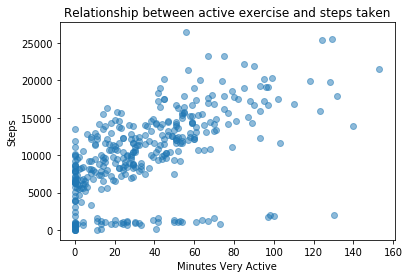

In [121]:

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'], alpha = 0.5)
plt.title('Relationship between active exercise and steps taken')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here

Based on the scatterplot, we can corroborate that there is a positive medium linear relationship between them. On
one hand, we see that in some cases, the exercises that the person is doing is not related with taking steps where
there can be points with high minuites of active exercise but with low amount of steps. 

On the other hand, we see data points with 0 minutes of active exercises and many steps taking. Maybe this steps
are counted as minutes fairly active. 

Additionally, it seems that most of the plots are lower than 100 minutes and less than 2000 steps.

"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [122]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

'''It seems that the relation is not linear, the correlation coeff is too close to 0 which indicates
no relationship, thou a bit positive.'''

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

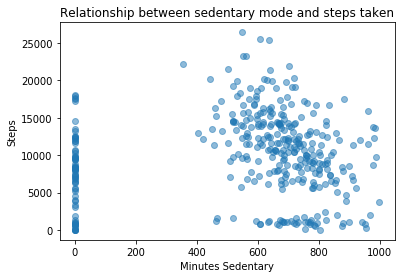

In [123]:
# your code here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'], alpha = 0.5)
plt.title('Relationship between sedentary mode and steps taken')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here

As suspected, there is no clear relationship between minutes doing nothing and steps taking. Moreover, it does not
make sense ploting this since minutes sedentary by definition are minutes spent sitting down and no taking steps.


"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [124]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

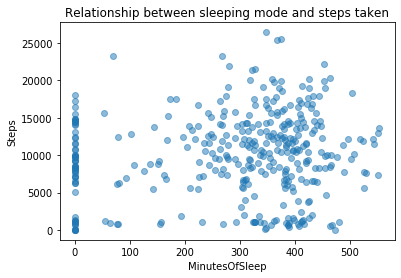

In [125]:
# your code here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'], alpha = 0.5)
plt.title('Relationship between sleeping mode and steps taken')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here

As in the previous analysis, there is no relationship between sleeping and taking steps since it's not possible
to walk while you sleep. There are some cases where the person is a sleepwalker but we can say for sure if this
person suffers from that condition. Maybe Miquel after Razmatazz but who knows. 

"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [126]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [138]:
# your code here
cor_fit = fitbit.loc[:,columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [139]:
# your code here
cor_fit.sort_values(by=['Steps'], ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


In [ ]:
''' 
Based on the correlation matrix, Steps has a positive correlation with all the varibales at hand. Comparing it
with Minutes Very Active, we can see that the relation is also linear and somehow with medium strenght. 

Followed by Floors with a correlation of 0.30. This also makes sense as you takes steps to go to the next floor.

There is a low strenght linear relation with Calorie burned, which is intiutive since taking steps is consider
a cardio exercise. 


'''

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [4]:
# your code here

time_grades = pd.read_csv('time_grades.csv').drop('Unnamed: 0', axis =1)
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

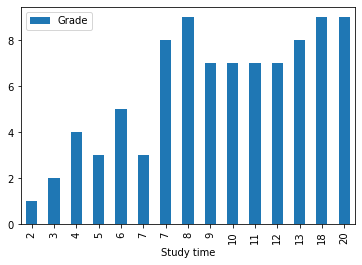

In [152]:
# your code here
time_grades_sort = time_grades.sort_values(by = ['Study time'])

time_grades_sort.plot(x='Study time', y='Grade', kind='bar')

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [153]:
# your code here
time_grades['Study time'].corr(time_grades['Grade'], method= 'pearson')

0.7980456073578858

In [157]:
time_grades['Study time'].corr(time_grades['Grade'], method= 'spearman')

0.819658753036942

In [ ]:
"""
your commments here

In both correlations, pearson and spearman, the correlation indicates a strong, linear and positive relation
between Study time and the grade the student gets. It is very intiutive to think that the more you study, more
likely it is to get a good grade. 


Notes for me to read later: [Its 11:40 pm Sunday night :( ]

The Pearson correlation evaluates the linear relationship between two continuous variables. 
A relationship is linear when a change in one variable is associated with a proportional change 
in the other variable. For example, you might use a Pearson correlation to evaluate whether
increases in temperature at your production facility are associated with decreasing thickness 
of your chocolate coating.


Spearman correlation is often used to evaluate relationships involving ordinal variables.
For example, you might use a Spearman correlation to evaluate whether the order in which employees 
complete a test exercise is related to the number of months they have been employed.


"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

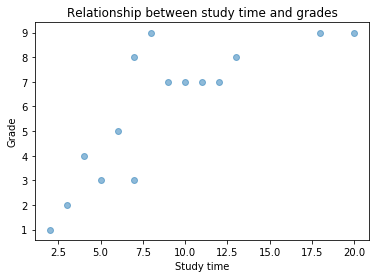

0.7980456073578858


In [9]:
# your code here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'], alpha = 0.5)
plt.title('Relationship between study time and grades')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()


print(time_grades['Study time'].corr(time_grades['Grade']))

In [ ]:
"""
your commments here

Based on the scatter plot using Study time in minutes as the explantory variable and the Grade as the target 
variable, it seems like the relation is positive, medium high strenght and linear. The more you study
the more likely it is to get a higher grade. Additionally, it is worth mention that this is no always the case
as there are people who does not need to many hours of study to get a good grade. 

We can corroborate this information by looking at the correlation coefficient which is positive and closer to 
one than to zero. This indicates that this two variables are strongly correlated. 


"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""